# Understanding the pace of digital technology adoption in basic private schools across Brazil

Private schools constitute a significant portion of the educational landscape in Brazil, representing [actual percentage] of all schools and enrolling more than 9 million students as of 2022. This analysis aims to explore the defining characteristics of these institutions, their growth rate, and the impact of technological advancements on their pedagogical and administrative approaches across various sizes and regions.

This analysis is focused on what will be called basic education, which are schools that enroll students from preschool to high school.

## Loading the database and inspecting the data

The source of this analysis is the Educational Census, collected anually by INEP, National Institute of Studies and Educational Research. The raw data was sanitized by the non profit organization [Base dos Dados](https://basedosdados.org/). A comple of filters were applied to examine just the target schools:
- ano: >= 2013 (last 10 years from the date of this study)
- rede: 4 (indicates that this is a private school)
- tipo_situacao_funcionamento: 1 (indicates that, at the year of the census, the school was active)

Raw source and dictionary: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar

Sanitized data: https://basedosdados.org/dataset/dae21af4-4b6a-42f4-b94a-4c2061ea9de5?table=b88bf231-0288-40ce-9a3f-72535a88fa40

In [1]:
# Single file containing 10 years of Census data
census_data = './_data/inep_censo_privado.csv'

In [2]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Disable the limit of columns to be shown
pd.set_option('display.max_columns', 0)

In [4]:
# First look at the data
df = pd.read_csv(census_data, low_memory = False)
df

,ano,sigla_uf,id_municipio,id_escola,rede,tipo_categoria_escola_privada,tipo_localizacao,tipo_localizacao_diferenciada,tipo_situacao_funcionamento,id_orgao_regional,data_ano_letivo_inicio,data_ano_letivo_termino,vinculo_secretaria_educacao,vinculo_seguranca_publica,vinculo_secretaria_saude,vinculo_outro_orgao,poder_publico_parceria,tipo_poder_publico_parceria,conveniada_poder_publico,tipo_convenio_poder_publico,forma_contratacao_termo_colaboracao,forma_contratacao_termo_fomento,forma_contratacao_acordo_cooperacao,forma_contratacao_prestacao_servico,forma_contratacao_cooperacao_tecnica_financeira,forma_contratacao_consorcio_publico,tipo_atendimento_escolarizacao,tipo_atendimento_atividade_complementar,tipo_atendimento_aee,mantenedora_escola_privada_empresa,mantenedora_escola_privada_ong,mantenedora_escola_privada_oscip,mantenedora_escola_privada_ong_oscip,mantenedora_escola_privada_sindicato,mantenedora_escola_privada_sistema_s,mantenedora_escola_privada_sem_fins,cnpj_escola_privada,cnpj_mantenedora,tipo_regulamentacao,tipo_responsavel_regulamentacao,...,quantidade_matricula_ead,quantidade_matricula_infantil_integral,quantidade_matricula_infantil_creche_integral,quantidade_matricula_infantil_pre_escola_integral,quantidade_matricula_fundamental_integral,quantidade_matricula_fundamental_anos_iniciais_integral,quantidade_matricula_fundamental_anos_finais_integral,quantidade_matricula_medio_integral,quantidade_docente_educacao_basica,quantidade_docente_infantil,quantidade_docente_infantil_creche,quantidade_docente_infantil_pre_escola,quantidade_docente_fundamental,quantidade_docente_fundamental_anos_iniciais,quantidade_docente_fundamental_anos_finais,quantidade_docente_medio,quantidade_docente_profissional,quantidade_docente_profissional_tecnica,quantidade_docente_eja,quantidade_docente_eja_fundamental,quantidade_docente_eja_medio,quantidade_docente_especial,quantidade_docente_especial_comum,quantidade_docente_especial_exclusiva,quantidade_turma_educacao_basica,quantidade_turma_infantil,quantidade_turma_infantil_creche,quantidade_turma_infantil_pre_escola,quantidade_turma_fundamental,quantidade_turma_fundamental_anos_iniciais,quantidade_turma_fundamental_anos_finais,quantidade_turma_medio,quantidade_turma_profissional,quantidade_turma_profissional_tecnica,quantidade_turma_eja,quantidade_turma_eja_fundamental,quantidade_turma_eja_medio,quantidade_turma_especial,quantidade_turma_especial_comum,quantidade_turma_especial_exclusiva
0,2013,SP,3518800,35172364,4,4.0,1,0.0,1,10402,2013-01-01,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,4.384427e+13,4.384427e+13,1.0,NaN,...,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,25.0,3.0,2.0,2.0,19.0,12.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,24.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,GO,5208707,52084108,4,1.0,1,0.0,1,00002,2013-01-28,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,5.891891e+12,5.891891e+12,1.0,NaN,...,0.0,59.0,59.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,9.0,0.0,9.0,18.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,16.0,16.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2013,SP,3550308,35433032,4,4.0,1,0.0,1,19918,2013-02-06,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,0.0,7.664093e+12,7.664093e+12,1.0,NaN,...,0.0,135.0,135.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,13.0,13.0,0.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,SP,3550308,35406193,4,4.0,1,0.0,1,19928,2013-02-06,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,5.220780e+12,5.220780e+12,1.0,NaN,...,0.0,326.0,266.0,60.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,SP,3523909,35481567,4,1.0,1,0.0,1,

In [5]:
# Summarize statistics for a single year of data
df[df['ano'] == 2022].describe()

,ano,id_municipio,id_escola,rede,tipo_categoria_escola_privada,tipo_localizacao,tipo_localizacao_diferenciada,tipo_situacao_funcionamento,vinculo_secretaria_educacao,vinculo_seguranca_publica,vinculo_secretaria_saude,vinculo_outro_orgao,poder_publico_parceria,tipo_poder_publico_parceria,conveniada_poder_publico,tipo_convenio_poder_publico,forma_contratacao_termo_colaboracao,forma_contratacao_termo_fomento,forma_contratacao_acordo_cooperacao,forma_contratacao_prestacao_servico,forma_contratacao_cooperacao_tecnica_financeira,forma_contratacao_consorcio_publico,tipo_atendimento_escolarizacao,tipo_atendimento_atividade_complementar,tipo_atendimento_aee,mantenedora_escola_privada_empresa,mantenedora_escola_privada_ong,mantenedora_escola_privada_oscip,mantenedora_escola_privada_ong_oscip,mantenedora_escola_privada_sindicato,mantenedora_escola_privada_sistema_s,mantenedora_escola_privada_sem_fins,cnpj_escola_privada,cnpj_mantenedora,tipo_regulamentacao,tipo_responsavel_regulamentacao,id_escola_sede,id_ies_ofertante,local_funcionamento_predio_escolar,tipo_local_funcionamento_predio_escolar,...,quantidade_matricula_ead,quantidade_matricula_infantil_integral,quantidade_matricula_infantil_creche_integral,quantidade_matricula_infantil_pre_escola_integral,quantidade_matricula_fundamental_integral,quantidade_matricula_fundamental_anos_iniciais_integral,quantidade_matricula_fundamental_anos_finais_integral,quantidade_matricula_medio_integral,quantidade_docente_educacao_basica,quantidade_docente_infantil,quantidade_docente_infantil_creche,quantidade_docente_infantil_pre_escola,quantidade_docente_fundamental,quantidade_docente_fundamental_anos_iniciais,quantidade_docente_fundamental_anos_finais,quantidade_docente_medio,quantidade_docente_profissional,quantidade_docente_profissional_tecnica,quantidade_docente_eja,quantidade_docente_eja_fundamental,quantidade_docente_eja_medio,quantidade_docente_especial,quantidade_docente_especial_comum,quantidade_docente_especial_exclusiva,quantidade_turma_educacao_basica,quantidade_turma_infantil,quantidade_turma_infantil_creche,quantidade_turma_infantil_pre_escola,quantidade_turma_fundamental,quantidade_turma_fundamental_anos_iniciais,quantidade_turma_fundamental_anos_finais,quantidade_turma_medio,quantidade_turma_profissional,quantidade_turma_profissional_tecnica,quantidade_turma_eja,quantidade_turma_eja_fundamental,quantidade_turma_eja_medio,quantidade_turma_especial,quantidade_turma_especial_comum,quantidade_turma_especial_exclusiva
count,45977.0,4.597700e+04,4.597700e+04,45977.0,41759.000000,45977.000000,41759.000000,45977.0,0.0,0.0,0.0,0.0,41759.000000,8656.000000,0.0,0.0,8656.000000,8656.000000,8656.000000,8656.000000,8656.0,8656.0,8656.000000,8656.000000,8656.000000,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000,4.175900e+04,4.175900e+04,41759.000000,40998.000000,1.270000e+02,163.000000,41759.000000,40643.000000,...,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.00000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,40921.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.000000,41011.00000,41011.000000,41011.000000,41011.000000,41011.000000
mean,2022.0,3.319769e+06,3.323307e+07,4.0,1.656769,1.015965,0.002227,1.0,NaN,NaN,NaN,NaN,0.207285,1.291359,NaN,NaN,0.745610,0.102010,0.054644,0.160005,0.0,0.0,0.944547,0.028535,0.098775,0.694341,0.011207,0.005747,0.016044,0.029838,0.031107,0.270984,3.407285e+13,3.453461e+13,1.040925,2.567198,3.387220e+07,3911.453988,0.973275,1.534336,...,7.684743,22.561996,18.518300,4.043696,3.501963,2.430616,1.071347,2.155324,15.462965,4.806407,3.022238,2.192811,8.622101,4.963368,4.521322,3.281029,0.89861,0.866450,0.309816,0.234012,0.114196,6.157890,5.75

In [6]:
# Count non nulls and show data types
df[df['ano'] == 2022].info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45977 entries, 148965 to 402872
Data columns (total 388 columns):
 #    Column                                                     Non-Null Count  Dtype  
---   ------                                                     --------------  -----  
 0    ano                                                        45977 non-null  int64  
 1    sigla_uf                                                   45977 non-null  object 
 2    id_municipio                                               45977 non-null  int64  
 3    id_escola                                                  45977 non-null  int64  
 4    rede                                                       45977 non-null  int64  
 5    tipo_categoria_escola_privada                              41759 non-null  float64
 6    tipo_localizacao                                           45977 non-null  int64  
 7    tipo_localizacao_diferenciada                              41759 non-null  fl

Most fields are encoded and their meanings are described in the data's dictionary. Some fields are no longer collected by the Census and thus have no records. There are many columns that can be used to better understand the adoption of digital technologies in private schools across Brazil, some of which are:

- laboratorio_informatica (has computer lab)
- equipamento_computador (has computer)
- equipamento_tv (has TV)
- equipamento_lousa_digital (has digital whiteboard)
- desktop_aluno (has student computer)
- computador_portatil_aluno (has student laptop)
- tablet_aluno (has student table)
- internet (has access to the internet)
- internet_alunos (has student internet)
- internet_administrativo (has administrative internet)
- internet_aprendizagem (has internet for learning purposes)
- internet_comunidade (has internet for the community)
- acesso_internet_computador (has internet access on computers)
- acesso_internet_dispositivo_pessoal (has internet access on personal devices)
- tipo_rede_local (type of local network)
- banda_larga (has broadband internet)

## Visualizing the data

This section will analyze in more depth the variables of importance to understand the pace of digital technology adoption.

In [20]:
df_schools_by_year = df.groupby(['ano']).size()
df_schools_by_year_growth_rate = pd.DataFrame(df_schools_by_year.pct_change() * 100, columns = ['growth_rate'])

<Axes: xlabel='Year', ylabel='Growth Percentage'>

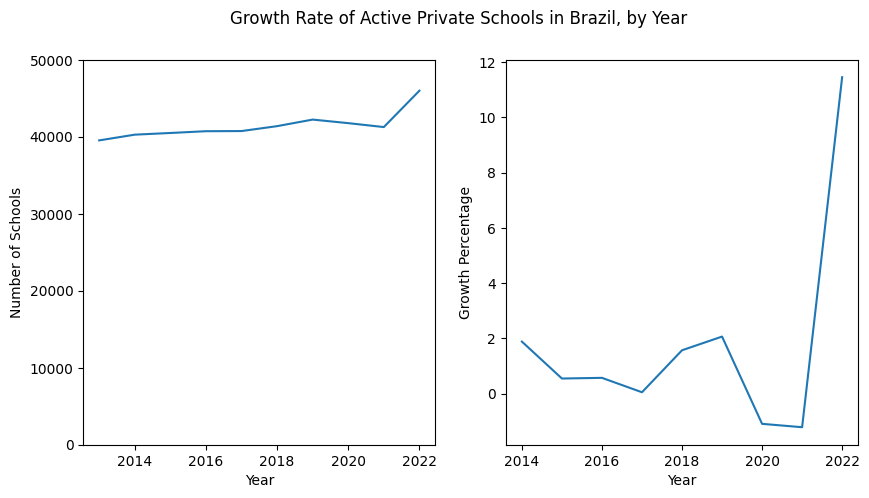

In [21]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Growth Rate of Active Private Schools in Brazil, by Year')

df_schools_by_year.plot(ax = axis[0], xlabel = 'Year', ylabel = 'Number of Schools', ylim = (0, 50000))
df_schools_by_year_growth_rate.plot(ax = axis[1], xlabel = 'Year', ylabel = 'Growth Percentage', legend = False)

Following the pandemic, the number of active private schools in Brazil dropped for the first time in the series, but the last data point shows an increase in more than 10%. Many new schools opened in the country last year.

In [9]:
df_enrollments_by_year = df[['ano', 'quantidade_matricula_educacao_basica']].groupby(['ano'])

In [10]:
df_enrollments_by_year_sum = df_enrollments_by_year.sum()
df_enrollments_by_year_mean = df_enrollments_by_year.mean()

<Axes: xlabel='Year', ylabel='Average Number of Enrollments'>

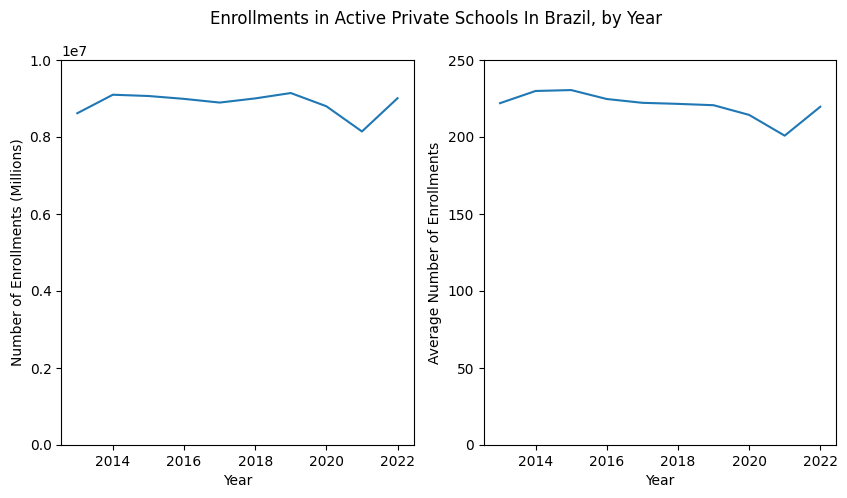

In [11]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Enrollments in Active Private Schools In Brazil, by Year')

df_enrollments_by_year_sum.plot(ax = axis[0], xlabel = 'Year', ylabel = 'Number of Enrollments (Millions)', ylim = (0, 10000000), legend = False)
df_enrollments_by_year.mean().plot(ax = axis[1], xlabel = 'Year', ylabel = 'Average Number of Enrollments', ylim = (0, 250), legend = False)

Despite the increase in the number of schools between 2021 and 2022, the number of enrollments didn't achieve its highest in the series. This suggests that new schools are smaller, which may be due to post pandemic health sanitation measures or economic factors, which won't be further explored in this study.

<Axes: xlabel='State', ylabel='Number of Schools'>

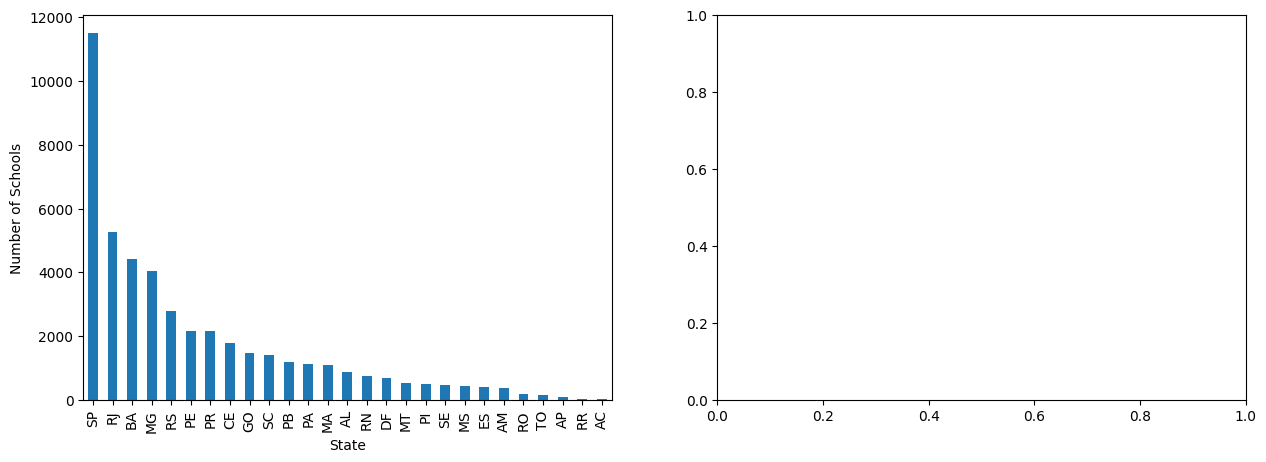

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

df[df['ano'] == 2022]['sigla_uf'].value_counts().plot.bar(ax = axes[0], xlabel = 'State', ylabel = 'Number of Schools')